<a href="https://colab.research.google.com/github/LakshithaMurali/TECHNICAL-ASSESSMENT/blob/main/TASK_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                             **EXPLORATORY DATA ANALYSIS**

# OBJECTIVE
# 	The ultimate goal behind this analysis is to perform exploratory              data analysis on the provided book data set, with the vision of              developing a book recommendation system

# Book Recommendation System
# 	 Provides suggestion based on personal preferences.
# 	 The aim is to enhance user engagement and satisfaction by providing relevant and appealing reading choices.
# 	This system can consider factors like genre, author, user ratings and similar user’s preferences to offer tailored book recommendations






                             
                 

# Our Solution: Predicts the user preferences based on
# 	Average rating
# 	Text Reviews
# 	Rating Count
# 	Desired Authors
# 	Title of the Book


# **DATA CLEANING PROCESS**

# **# HANDLING MISSING VALUES:**
**Dealing with missing values is essential to ensure the reliability and effectiveness of statistical analyses and machine learning models. **

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
onehotencoder = OneHotEncoder(handle_unknown='ignore')


In [ ]:
df = pd.read_excel('/content/Task 3 Data Set.xlsx')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11127 non-null  int64  
 1   title               11127 non-null  object 
 2   authors             11127 non-null  object 
 3   average_rating      11127 non-null  float64
 4   isbn                11127 non-null  object 
 5   isbn13              11127 non-null  int64  
 6   language_code       11127 non-null  object 
 7   num_pages           11127 non-null  int64  
 8   ratings_count       11127 non-null  int64  
 9   text_reviews_count  11127 non-null  int64  
 10  publication_date    11127 non-null  object 
 11  publisher           11127 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


In [ ]:
df.isnull().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

**#1.Delete the Column with null values**

In [ ]:
update_df = df.dropna(axis=1)

In [ ]:
update_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11127 non-null  int64  
 1   title               11127 non-null  object 
 2   authors             11127 non-null  object 
 3   average_rating      11127 non-null  float64
 4   isbn                11127 non-null  object 
 5   isbn13              11127 non-null  int64  
 6   language_code       11127 non-null  object 
 7   num_pages           11127 non-null  int64  
 8   ratings_count       11127 non-null  int64  
 9   text_reviews_count  11127 non-null  int64  
 10  publication_date    11127 non-null  object 
 11  publisher           11127 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


**#2.Deleting the rows with missing data**

In [ ]:
update_df = df.dropna(axis=0)

In [ ]:
update_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11127 non-null  int64  
 1   title               11127 non-null  object 
 2   authors             11127 non-null  object 
 3   average_rating      11127 non-null  float64
 4   isbn                11127 non-null  object 
 5   isbn13              11127 non-null  int64  
 6   language_code       11127 non-null  object 
 7   num_pages           11127 non-null  int64  
 8   ratings_count       11127 non-null  int64  
 9   text_reviews_count  11127 non-null  int64  
 10  publication_date    11127 non-null  object 
 11  publisher           11127 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


# *FEATURE SCALING

In [ ]:
pip install -U scikit-learn


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df.head(11127)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,Unnamed: 12
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPrÃ©,4.57,439785960,9780000000000,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,NaN
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPrÃ©,4.49,439358078,9780000000000,eng,870,2153167,29221,2004-01-09 00:00:00,Scholastic Inc.,NaN
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9780000000000,eng,352,6333,244,2003-01-11 00:00:00,Scholastic,NaN
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPrÃ©,4.56,043965548X,9780000000000,eng,435,2339585,36325,2004-01-05 00:00:00,Scholastic Inc.,NaN
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPrÃ©,4.78,439682584,9780000000000,eng,2690,41428,164,9/13/2004,Scholastic,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11122,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9780000000000,eng,512,156,20,12/21/2004,Da Capo Press,NaN
11123,45633,You Bright and Risen Angels,William T. Vollmann,4.08,140110879,9780000000000,eng,635,783,56,1988-01-12 00:00:00,Penguin Books,NaN
11124,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,140131965,9780000000000,eng,415,820,95,1993-01-08 00:00:00,Penguin Books,NaN
11125,45639,Poor People,William T. Vollmann,3.72,60878827,9780000000000,eng,434,769,139,2/27/2007,Ecco,NaN


In [ ]:
df.describe().round(2)

,bookID,ratings_count,text_reviews_count
count,11127.00,11127.00,11127.00
mean,21310.94,17936.47,541.86
std,13093.36,112479.43,2576.18
min,1.00,0.00,0.00
25%,10287.00,104.00,9.00
50%,20287.00,745.00,46.00
75%,32104.50,4993.50,237.50
max,45641.00,4597666.00,94265.00


# *NORMALIZATION:
**The primary goal of normalization is to transform the data in a way that brings all the values onto a common scale, making them comparable and avoiding issues related to different units or magnitudes.**

In [ ]:
new_df.head(11127)

,average_rating,ratings_count
0,4.57,2095690
1,4.49,2153167
2,4.42,6333
3,4.56,2339585
4,4.78,41428
...,...,...
11122,4.06,156
11123,4.08,783
11124,3.96,820
11125,3.72,769


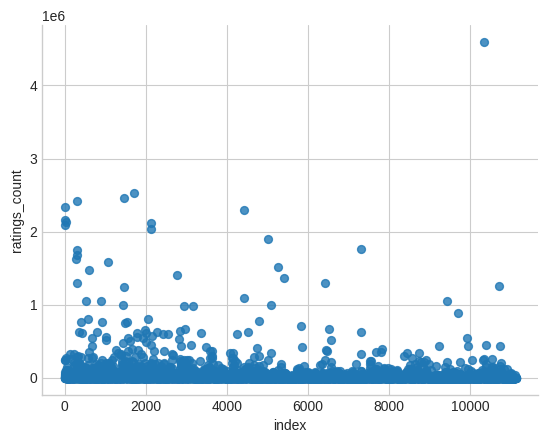

In [ ]:
from matplotlib import pyplot as plt
_df_13.plot(kind='scatter', x='index', y='ratings_count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

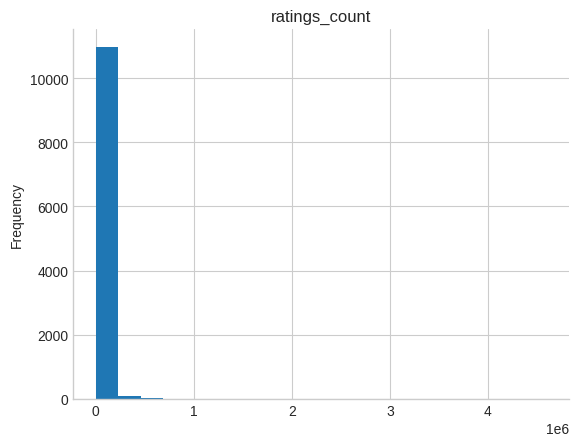

In [ ]:
from matplotlib import pyplot as plt
_df_12['ratings_count'].plot(kind='hist', bins=20, title='ratings_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

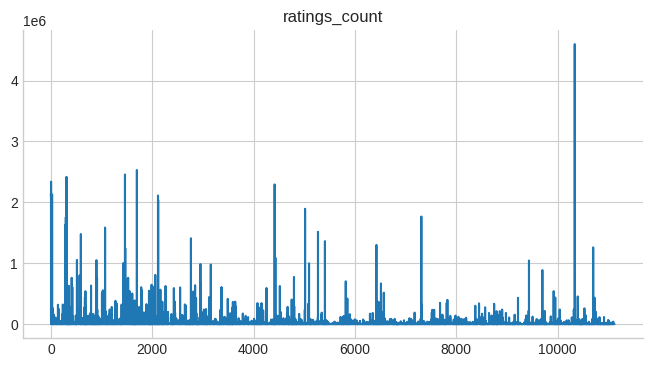

In [ ]:
from matplotlib import pyplot as plt
_df_17['ratings_count'].plot(kind='line', figsize=(8, 4), title='ratings_count')
plt.gca().spines[['top', 'right']].set_visible(False)

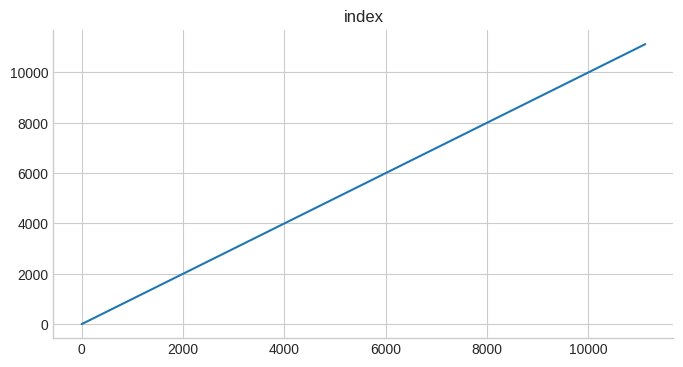

In [ ]:
from matplotlib import pyplot as plt
_df_16['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

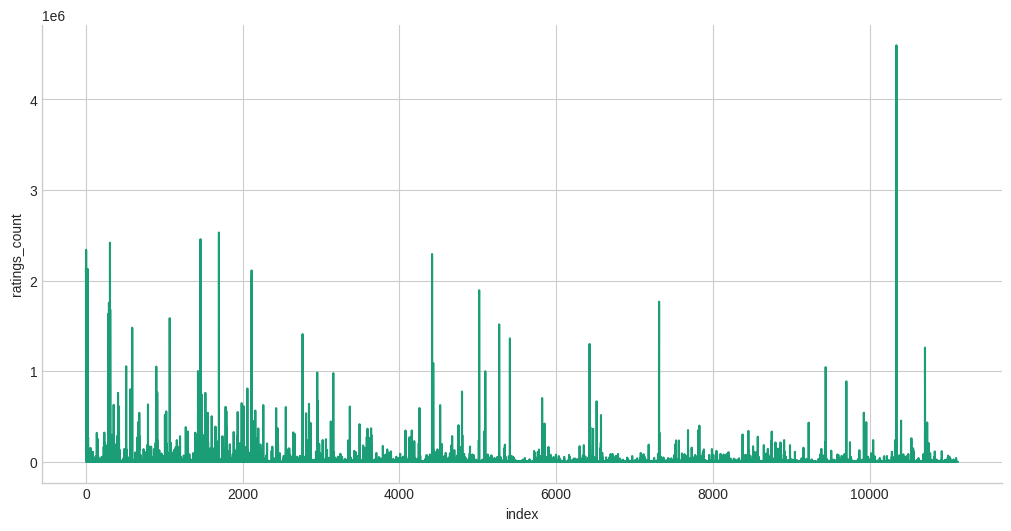

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['ratings_count']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('ratings_count')

# NOTE: We consider the other columns as meta data sets
# **META DATA: A data which provides support to the main data frames and cells**



# **With the help of average_rating and ratings_count we will get the  most commented books of our dataset**

In [ ]:
scaler = MinMaxScaler()
normalized_df = scaler.fit_transform(new_df)
print(normalized_df)

The Normalization Values are calculated for the first five values of the average_ratings column by the formula:
X' = X-Xmin/Xmax-Xmin

1.4.457/4.78-4.42 = 15.233

2.4.49/4.78-4.42  = 14.966

3.4.42/4.78-4.42  = 14.733

4.4.56/4.78-4.42  = 15.2

5.4.78/4.78-4.42  = 15.93

# *STANDARDIZATION:
**The result of standardization is a distribution with a mean of 0 and a standard deviation of 1, making it easier to compare and analyze variables with different units, scales, or measurement criteria**

In [ ]:
scaler = StandardScaler()
standardized_df = scaler.fit_transform(new_df)
print(standardized_df)

The Standardization Values are calculated for the first five values of the average_ratings column by the formula:

Standardized Value:Originalvalue-Mean/Standard deviation

Mean:
4.57+4.49+4.42+4.56+4.78 / 5= 4.584

Standard deviation: 0.2737





# ***OUTLIER TREATMENT:**
**Outlier treatment refers to the process of identifying and handling outliers in a dataset. An outlier is an observation that significantly deviates from the overall pattern of the data, potentially indicating errors in data collection or measurement, or representing rare but valid instances**

In [ ]:
import statistics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
data.head

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,Unnamed: 12
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPrÃ©,4.57,439785960,9780000000000,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,NaN
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPrÃ©,4.56,043965548X,9780000000000,eng,435,2339585,36325,2004-01-05 00:00:00,Scholastic Inc.,NaN
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPrÃ©,4.49,439358078,9780000000000,eng,870,2153167,29221,2004-01-09 00:00:00,Scholastic Inc.,NaN
4416,15881,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling/Mary GrandPrÃ©,4.42,439064864,9780000000000,eng,341,2293963,34692,1999-02-06 00:00:00,Arthur A. Levine Books / Scholastic Inc.,NaN
5272,19063,The Book Thief,Markus Zusak/Cao XuÃ¢n Viá»‡t KhÆ°Æ¡ng,4.37,375831002,9780000000000,eng,552,1516367,86881,3/14/2006,Alfred A. Knopf,NaN


In [ ]:
def find_anomalies(data):
  anomalies =[]

  random_data_std = statistics.stdev(data)
  random_data_mean = statistics.mean(data)

  anomal_cutoff = random_data_std*3

  lower_limit = random_data_mean - anomaly_cut_off
  upper_limit = random_data_mean +anomaly_cut_off

  for outlier in data:
    if outlier > upper_limit or outlier < lower_limit:
      anomalies.append(outlier)
  return anomalies

In [ ]:
data.average_rating

0       4.57
3       4.56
1       4.49
4416    4.42
5272    4.37
23      4.36
1697    4.27
7312    4.25
6425    4.17
1069    4.13
Name: average_rating, dtype: object

In [ ]:
list_1 = find_anomalies(data['average_rating'])

# **No anomalies**

In [ ]:
len(data)

10

# **1.TO FIND WHETHER THE DATA IS SKEWED OR NOT**

In [ ]:
data.average_rating.skew()

-0.029164368024306615

In [ ]:
import seaborn as sns

<Axes: xlabel='average_rating', ylabel='Density'>

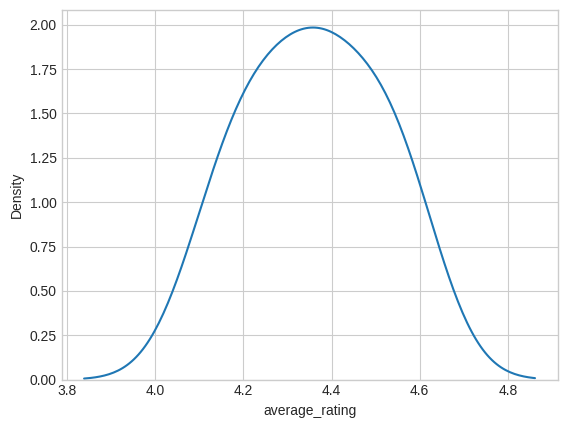

In [ ]:
sns.kdeplot(data.average_rating)

# **Therefore average_rating is Symmetrical distribution*

In [ ]:
data.ratings_count.skew()

-0.39951730289059684

<Axes: xlabel='ratings_count', ylabel='Density'>

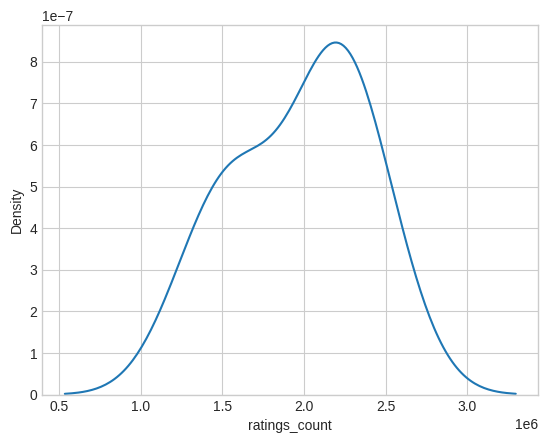

In [ ]:
sns.kdeplot(data.ratings_count)

# **Therefore ratings_count is Negative skew **

## **Anything below 40 or above 80 is considered as an outlier**

# **2.BOXPLOTS**

<Axes: >

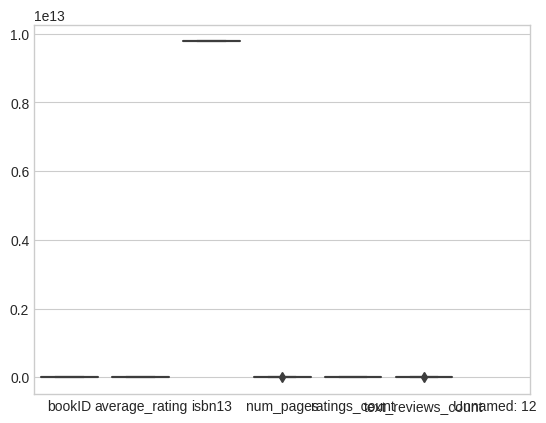

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=data)

The above code displays the plot below

* It considers everything above 75 or below 35 as outliers  




# **UNIVARIATE ANALYSIS**:
**Univariate analysis is a statistical method used to describe and analyze the distribution, central tendency, and variability of a single variable. It involves examining one variable at a time.**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline

# **1 METHOD USED : COUNT PLOT**

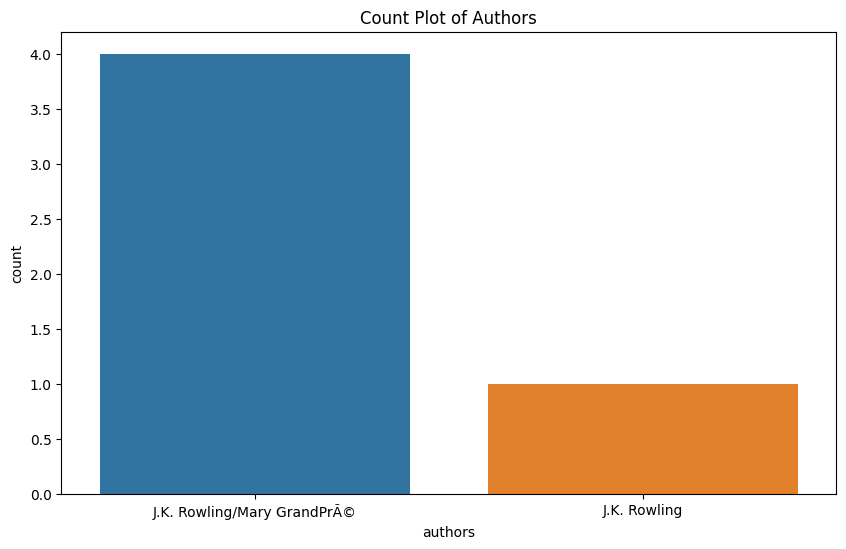

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data
data = {
    'average_rating': [4.57, 4.49, 4.42, 4.56, 4.78],
    'ratings_count': [2095690, 2153167, 6333, 2339585, 41428],
    'authors': ['J.K. Rowling/Mary GrandPrÃ©', 'J.K. Rowling/Mary GrandPrÃ©', 'J.K. Rowling', 'J.K. Rowling/Mary GrandPrÃ©', 'J.K. Rowling/Mary GrandPrÃ©']
}

# Create DataFrame
df = pd.DataFrame(data)

# Create count plot
plt.figure(figsize=(10,6))
sns.countplot(x='authors', data=df)
plt.title('Count Plot of Authors')
plt.show()


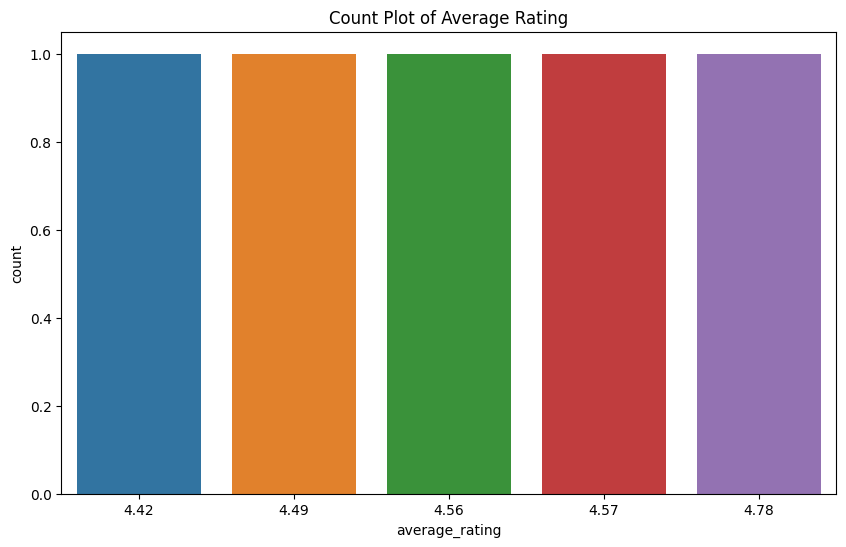

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data
data = {
    'average_rating': [4.57, 4.49, 4.42, 4.56, 4.78],
    'ratings_count': [2095690, 2153167, 6333, 2339585, 41428],
    'authors': ['J.K. Rowling/Mary GrandPrÃ©', 'J.K. Rowling/Mary GrandPrÃ©', 'J.K. Rowling', 'J.K. Rowling/Mary GrandPrÃ©', 'J.K. Rowling/Mary GrandPrÃ©']
}

# Create DataFrame
df = pd.DataFrame(data)

# Create count plot
plt.figure(figsize=(10,6))
sns.countplot(x='average_rating', data=df)
plt.title('Count Plot of Average Rating')
plt.show()

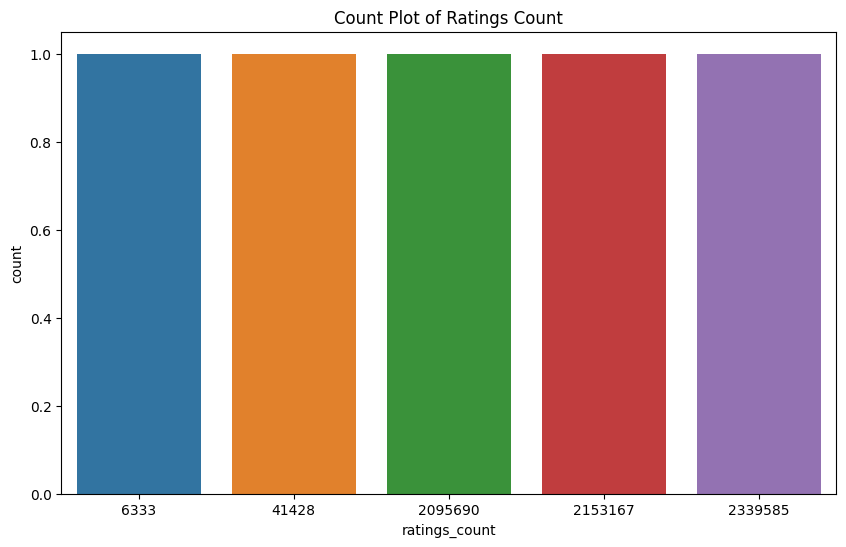

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data
data = {
    'average_rating': [4.57, 4.49, 4.42, 4.56, 4.78],
    'ratings_count': [2095690, 2153167, 6333, 2339585, 41428],
    'authors': ['J.K. Rowling/Mary GrandPrÃ©', 'J.K. Rowling/Mary GrandPrÃ©', 'J.K. Rowling', 'J.K. Rowling/Mary GrandPrÃ©', 'J.K. Rowling/Mary GrandPrÃ©']
}

# Create DataFrame
df = pd.DataFrame(data)

# Create count plot
plt.figure(figsize=(10,6))
sns.countplot(x='ratings_count', data=df)
plt.title('Count Plot of Ratings Count')
plt.show()

In [ ]:
df.head(11127)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPrÃ©,4.57,439785960,9780000000000,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPrÃ©,4.49,439358078,9780000000000,eng,870,2153167,29221,2004-01-09 00:00:00,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9780000000000,eng,352,6333,244,2003-01-11 00:00:00,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPrÃ©,4.56,043965548X,9780000000000,eng,435,2339585,36325,2004-01-05 00:00:00,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPrÃ©,4.78,439682584,9780000000000,eng,2690,41428,164,9/13/2004,Scholastic
...,...,...,...,...,...,...,...,...,...,...,...,...
11122,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9780000000000,eng,512,156,20,12/21/2004,Da Capo Press
11123,45633,You Bright and Risen Angels,William T. Vollmann,4.08,140110879,9780000000000,eng,635,783,56,1988-01-12 00:00:00,Penguin Books
11124,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,140131965,9780000000000,eng,415,820,95,1993-01-08 00:00:00,Penguin Books
11125,45639,Poor People,William T. Vollmann,3.72,60878827,9780000000000,eng,434,769,139,2/27/2007,Ecco


In [ ]:
df = df[['average_rating','ratings_count','authors']]

In [ ]:
df.head()

,average_rating,ratings_count,authors
0,4.57,2095690,J.K. Rowling/Mary GrandPrÃ©
1,4.49,2153167,J.K. Rowling/Mary GrandPrÃ©
2,4.42,6333,J.K. Rowling
3,4.56,2339585,J.K. Rowling/Mary GrandPrÃ©
4,4.78,41428,J.K. Rowling/Mary GrandPrÃ©


from matplotlib import pyplot as plt
_df_18['average_rating'].plot(kind='hist', bins=20, title='average_rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19['ratings_count'].plot(kind='hist', bins=20, title='ratings_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_20.groupby('authors').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_21.plot(kind='scatter', x='average_rating', y='ratings_count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_22['average_rating'].plot(kind='line', figsize=(8, 4), title='average_rating')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_23['ratings_count'].plot(kind='line', figsize=(8, 4), title='ratings_count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_24['authors'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_24, x='average_rating', y='authors', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_25['authors'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_25, x='ratings_count', y='authors', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

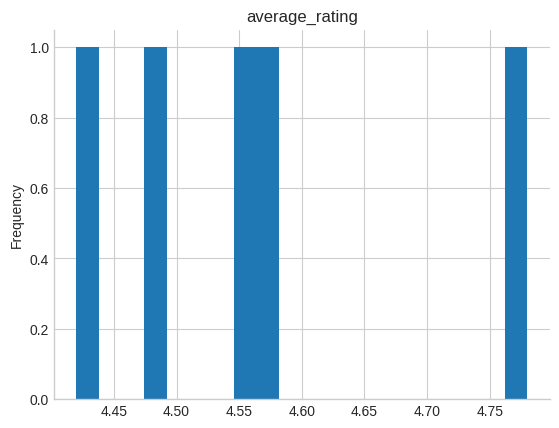

In [ ]:
from matplotlib import pyplot as plt
_df_18['average_rating'].plot(kind='hist', bins=20, title='average_rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

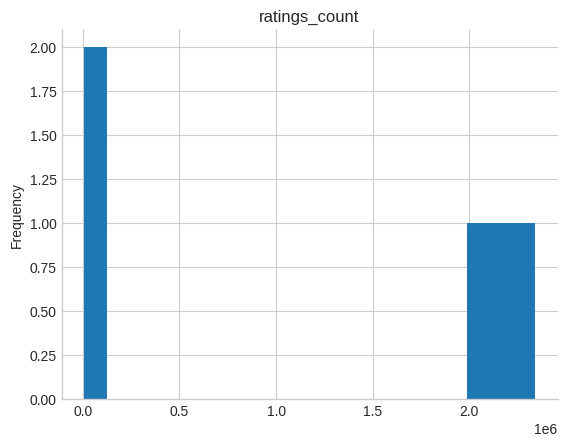

In [ ]:
from matplotlib import pyplot as plt
_df_19['ratings_count'].plot(kind='hist', bins=20, title='ratings_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

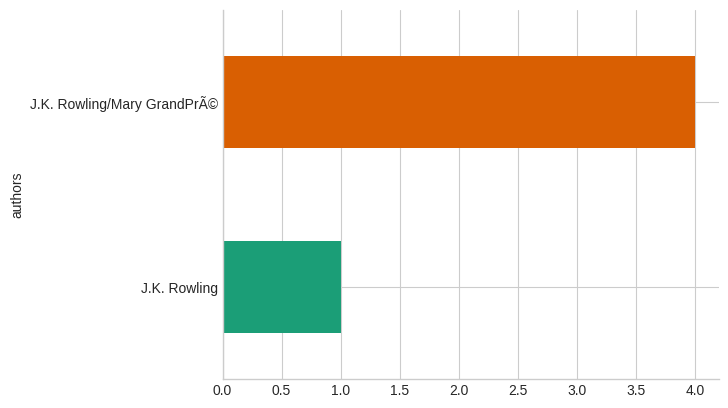

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_20.groupby('authors').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

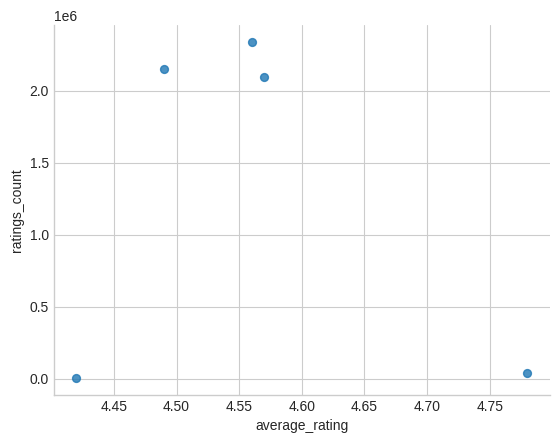

In [ ]:
from matplotlib import pyplot as plt
_df_21.plot(kind='scatter', x='average_rating', y='ratings_count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

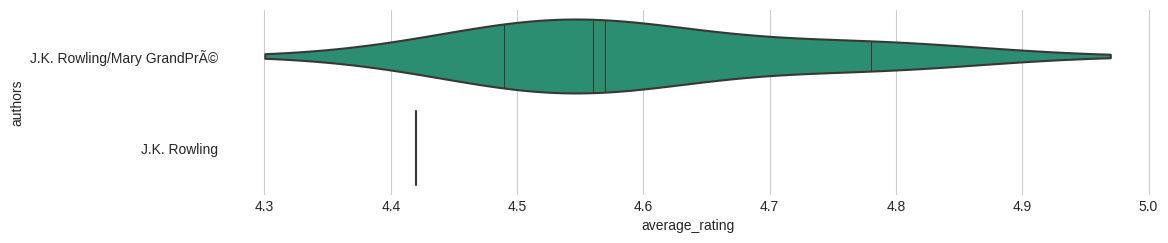

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_24['authors'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_24, x='average_rating', y='authors', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

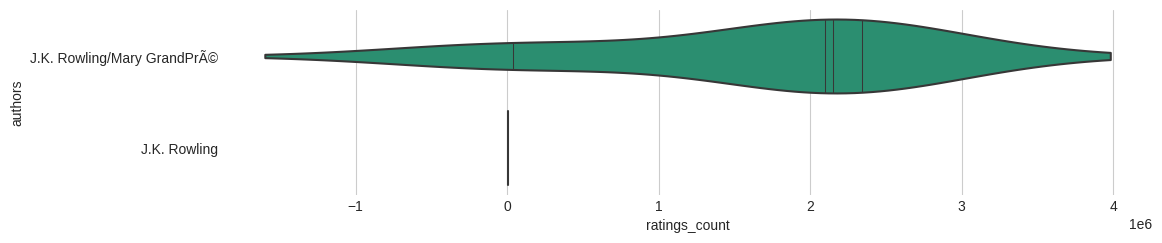

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_25['authors'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_25, x='ratings_count', y='authors', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

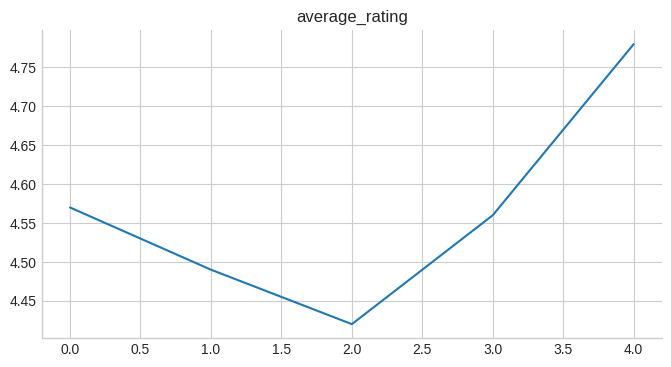

In [ ]:
from matplotlib import pyplot as plt
_df_22['average_rating'].plot(kind='line', figsize=(8, 4), title='average_rating')
plt.gca().spines[['top', 'right']].set_visible(False)

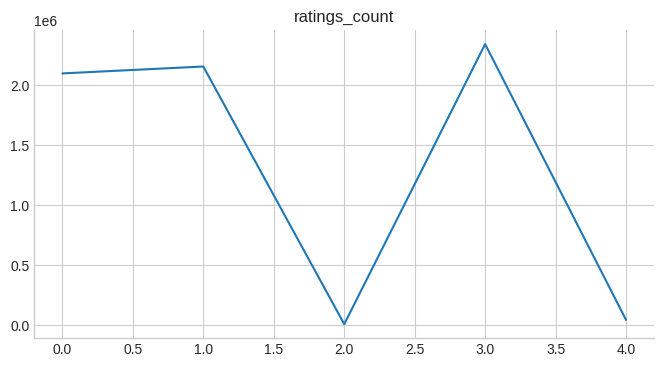

In [ ]:
from matplotlib import pyplot as plt
_df_23['ratings_count'].plot(kind='line', figsize=(8, 4), title='ratings_count')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
df.head()

,average_rating,ratings_count,authors
0,4.57,2095690,J.K. Rowling/Mary GrandPrÃ©
1,4.49,2153167,J.K. Rowling/Mary GrandPrÃ©
2,4.42,6333,J.K. Rowling
3,4.56,2339585,J.K. Rowling/Mary GrandPrÃ©
4,4.78,41428,J.K. Rowling/Mary GrandPrÃ©


# **BIVARIATE ANALYSIS**:
**Bivariate analysis is a statistical method that involves the analysis of two variables to determine the empirical relationship between them.**

# **1.Method Used: Histogram plot**

<Axes: xlabel='average_rating', ylabel='Count'>

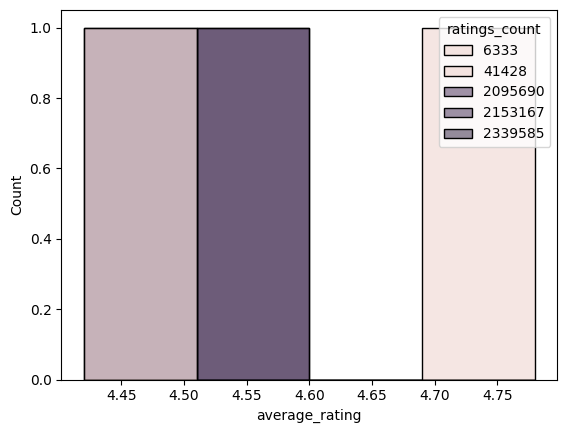

In [ ]:
sns.histplot(x='average_rating',hue='ratings_count', data=df,stat="count")

 **NUMERICAL ANALYSIS:**

**1.Postive corelation**

**2.Negative corelation**

**3.Zero corelation**

In [ ]:
df.head(11127)

,average_rating,ratings_count,authors
0,4.57,2095690,J.K. Rowling/Mary GrandPrÃ©
1,4.49,2153167,J.K. Rowling/Mary GrandPrÃ©
2,4.42,6333,J.K. Rowling
3,4.56,2339585,J.K. Rowling/Mary GrandPrÃ©
4,4.78,41428,J.K. Rowling/Mary GrandPrÃ©


In [ ]:
df.corr()

<ipython-input-23-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,average_rating,ratings_count
average_rating,1.000000,-0.229778
ratings_count,-0.229778,1.000000


from matplotlib import pyplot as plt
_df_0['average_rating'].plot(kind='hist', bins=20, title='average_rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['ratings_count'].plot(kind='hist', bins=20, title='ratings_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='average_rating', y='ratings_count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ratings_count']
  ys = series['average_rating']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('ratings_count', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('index')):
  _plot_series(series, series_name, i)
  fig.legend(title='index', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ratings_count')
_ = plt.ylabel('average_rating')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['ratings_count']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'ratings_count'}, axis=1)
              .sort_values('ratings_count', ascending=True))
  xs = counted['ratings_count']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('ratings_count', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('index')):
  _plot_series(series, series_name, i)
  fig.legend(title='index', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ratings_count')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_6['average_rating'].plot(kind='line', figsize=(8, 4), title='average_rating')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['ratings_count'].plot(kind='line', figsize=(8, 4), title='ratings_count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_8['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_8, x='average_rating', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_9['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_9, x='ratings_count', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

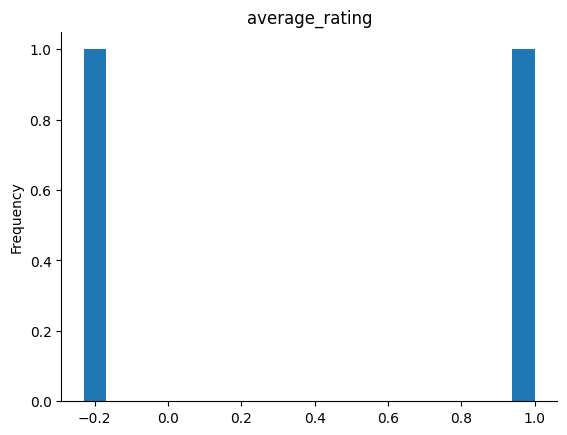

In [ ]:
from matplotlib import pyplot as plt
_df_0['average_rating'].plot(kind='hist', bins=20, title='average_rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

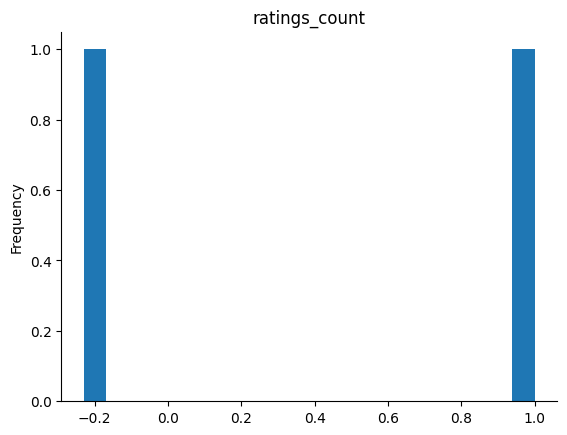

In [ ]:
from matplotlib import pyplot as plt
_df_1['ratings_count'].plot(kind='hist', bins=20, title='ratings_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

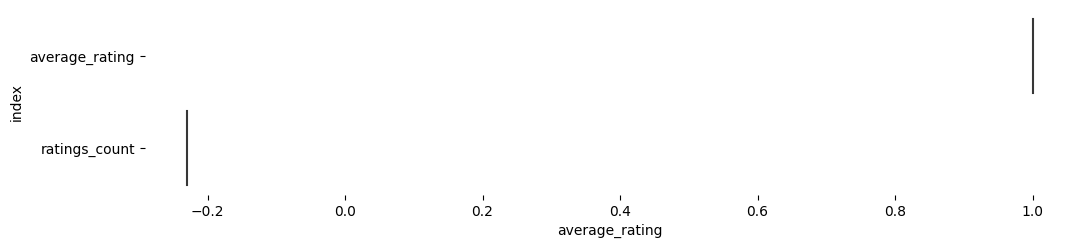

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_8['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_8, x='average_rating', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

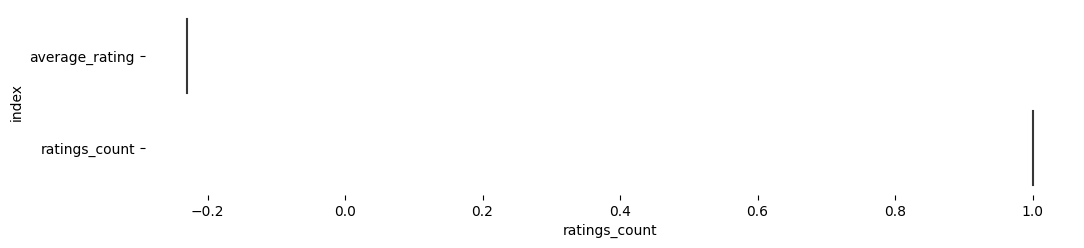

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_9['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_9, x='ratings_count', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

**Coorelation Function With Respect to Average Rating**

<ipython-input-30-15d07511c4f7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['average_rating'].sort_values(ascending=False).plot(kind='bar')


<Axes: >

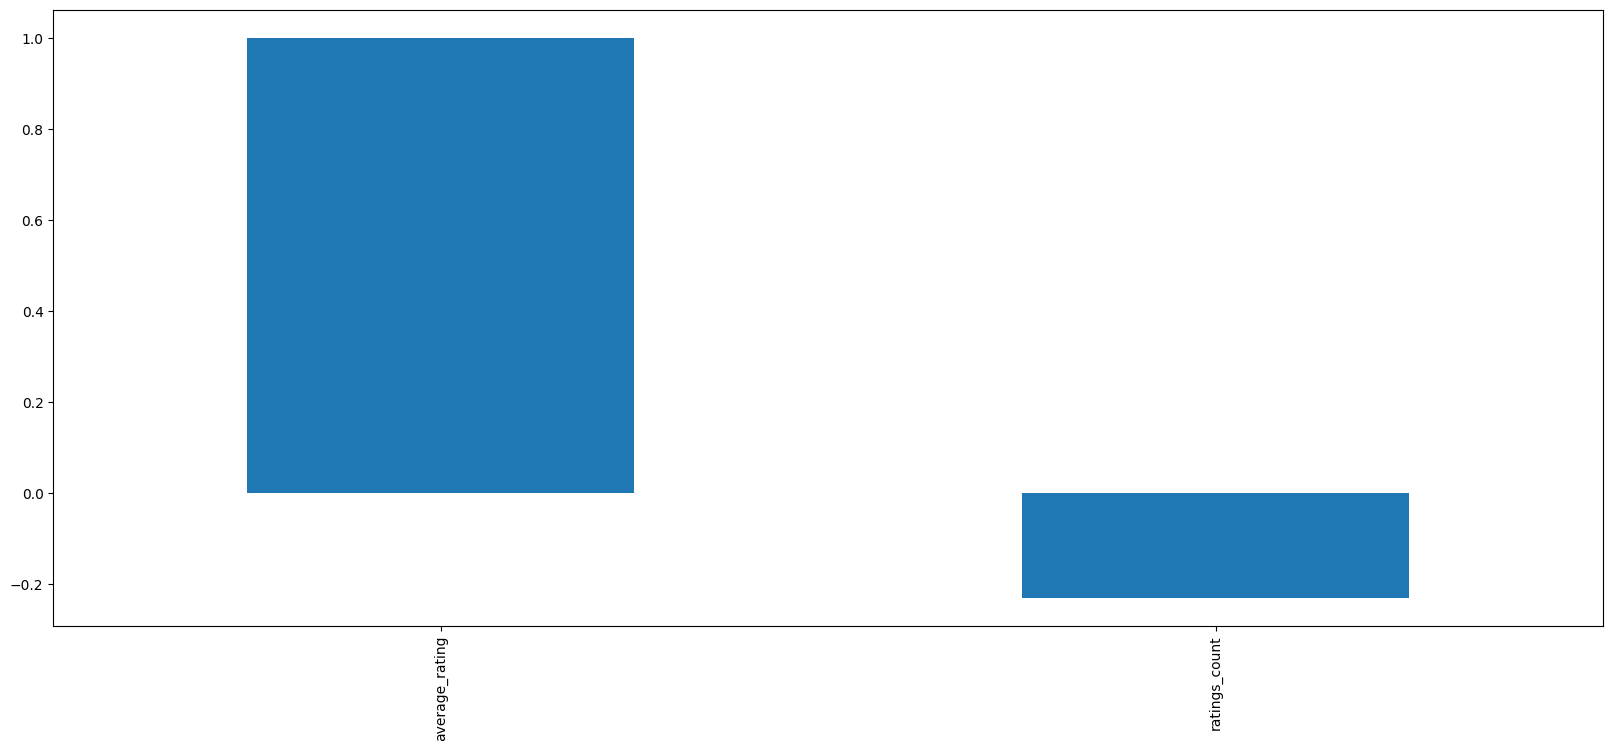

In [ ]:
plt.figure(figsize=(20,8))
df.corr()['average_rating'].sort_values(ascending=False).plot(kind='bar')

# FOR HEAT MAP WE CONSIDER THE ENTIRE DATASET

In [ ]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPrÃ©,4.57,439785960,9780000000000,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPrÃ©,4.49,439358078,9780000000000,eng,870,2153167,29221,2004-01-09 00:00:00,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9780000000000,eng,352,6333,244,2003-01-11 00:00:00,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPrÃ©,4.56,043965548X,9780000000000,eng,435,2339585,36325,2004-01-05 00:00:00,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPrÃ©,4.78,439682584,9780000000000,eng,2690,41428,164,9/13/2004,Scholastic


In [ ]:
df.corr()

<ipython-input-43-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
bookID,1.000000,-0.036949,-0.002228,-0.026223,-0.076815,-0.081284
average_rating,-0.036949,1.000000,-0.002075,0.150809,0.038205,0.033734
isbn13,-0.002228,-0.002075,1.000000,-0.009680,0.005560,0.008232
num_pages,-0.026223,0.150809,-0.009680,1.000000,0.034353,0.036998
ratings_count,-0.076815,0.038205,0.005560,0.034353,1.000000,0.865979
text_reviews_count,-0.081284,0.033734,0.008232,0.036998,0.865979,1.000000


<ipython-input-48-21378c8e98af>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='Paired')


<Axes: >

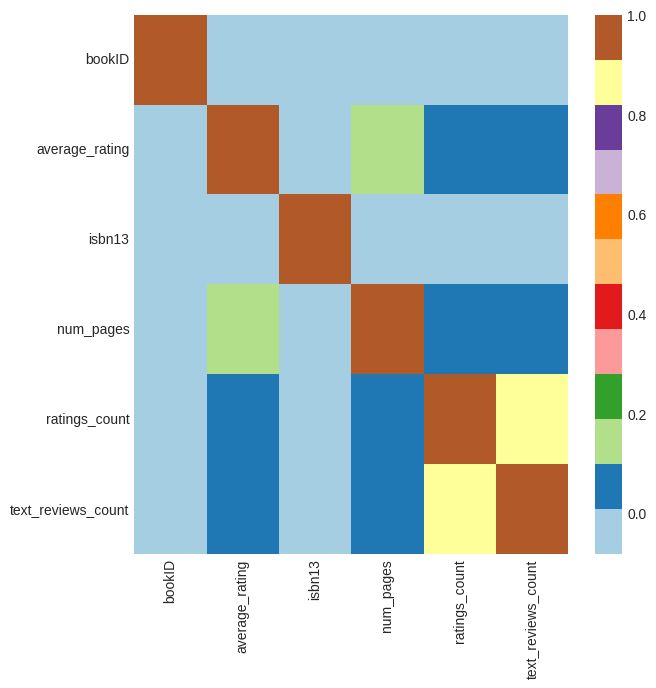

In [ ]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(), cmap='Paired')

# **BOOK RECOMMENDATION SYSTEM**
**Here is the goal of the above EDA process**

<ipython-input-39-3c3418bf75bb>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


<Axes: xlabel='average_rating', ylabel='title'>

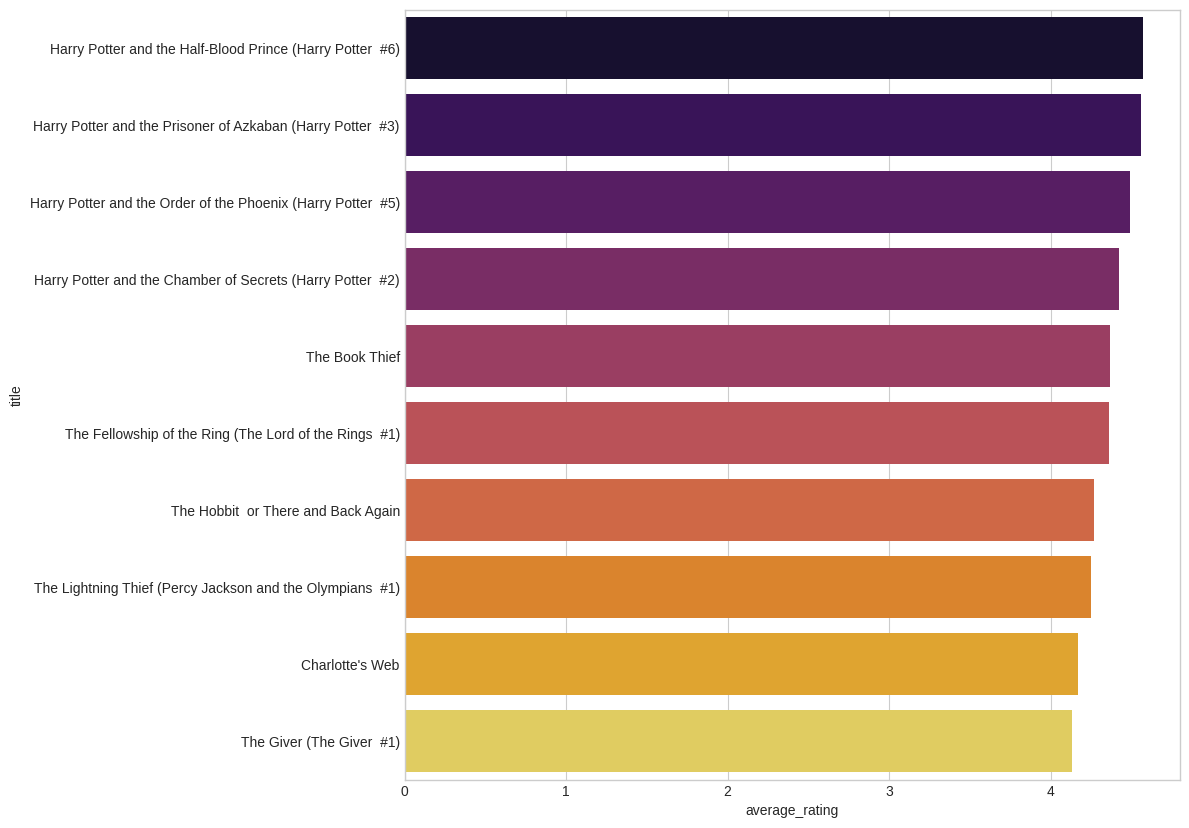

In [ ]:
top_ten = df[df['ratings_count'] > 1000000]
top_ten.sort_values(by='average_rating', ascending=False)
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10, 10))
data = top_ten.sort_values(by='average_rating', ascending=False).head(10)
sns.barplot(x="average_rating", y="title", data=data, palette='inferno')

# **We infer that most of the Harry Potter books are rated 5 which is the highest off all.**

 **The Book Recommendation model that we suggest is totally based upon two colums , average _rating and text_reviews**

# DATA PREPARATION

In [ ]:
df2 =()

In [ ]:
df2 = pd.DataFrame(df,columns = ['average_rating'])

In [ ]:
df2.head(11127)

,average_rating
0,4.57
1,4.49
2,4.42
3,4.56
4,4.78
...,...
11122,4.06
11123,4.08
11124,3.96
11125,3.72


**Create a new column called ‘rating_between’. We will divide our average rating column into different categories such as rating between 0 and 1, 1 and 2, etc. This will work as one of the features that we will build into our model so that it can make better predictions:**

In [ ]:
df2.loc[ (df2['average_rating'] >= 0) & (df2['average_rating'] <= 1), 'rating_between'] = "between 0 and 1"
df2.loc[ (df2['average_rating'] > 1) & (df2['average_rating'] <= 2), 'rating_between'] = "between 1 and 2"
df2.loc[ (df2['average_rating'] > 2) & (df2['average_rating'] <= 3), 'rating_between'] = "between 2 and 3"
df2.loc[ (df2['average_rating'] > 3) & (df2['average_rating'] <= 4), 'rating_between'] = "between 3 and 4"
df2.loc[ (df2['average_rating'] > 4) & (df2['average_rating'] <= 5), 'rating_between'] = "between 4 and 5"

 **Create two new DataFrames containing the different values of the rating_between column that we have just created. We will assign a value of 1 if one grade falls under a particular group, say 4 and 5, and the others will be assigned a value of 0.**

**We will apply the same approach to split the language code column to retrieve these lan **

** Apply the same approach to split the language code column to retrieve these languages individually and give them the value of 1 and 0 also where 1 will be assigned if the book is written in a particular language eg English and 0 if it is not written in English**

In [ ]:
rating_df = pd.get_dummies(df2['rating_between'])
2
language_df = pd.get_dummies(df2['language_code'])

**Concatenate these two data frames into one and name it as features. This DataFrame will be the functionality that we provide to the Book Recommendation System with Machine Learning. It will contain the values of rating_df and language_df and will also have the values of average grade and number of grades:**

In [ ]:
features = pd.concat([rating_df,
                      language_df,
                      df2['average_rating'],
                      df2['ratings_count']], axis=1)

# Min-Max scaler to reduce these values.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
features = min_max_scaler.fit_transform(features)

NameError: ignored

# KNN algorithm to build our Book Recommendation system

In [ ]:
model = neighbors.NearestNeighbors(n_neighbors=6, algorithm='ball_tree')
model.fit(features)
dist, idlist = model.kneighbors(features)

# FINAL RECOMMENDATION SYSTEM

In [ ]:
def BookRecommender(book_name):
    book_list_name = []
    book_id = df2[df2['title'] == book_name].index
    book_id = book_id[0]
    for newid in idlist[book_id]:
        book_list_name.append(df2.loc[newid].title)
    return book_list_name

BookNames = BookRecommender('Harry Potter and the Half-Blood Prince (Harry Potter  #6)')
BookNames

In [ ]:
new_df = pd.DataFrame(df,columns = ['average_rating','ratings_count'])

In [ ]:
model = neighbors.NearestNeighbors(n_neighbors=6, algorithm='ball_tree')
model.fit(features)
dist, idlist = model.kneighbors(features)